In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import requests
from bs4 import BeautifulSoup
%run GoogleDrive_sheet.ipynb

In [2]:
# Get SpreadSheet Data from GoogleDrive 
sheet = client.open('movie_metadata').sheet1
df = sheet.get_all_records()
df = pd.DataFrame(df)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 13 columns):
actor_1                      5043 non-null object
actor_2                      5043 non-null object
actor_3                      5043 non-null object
budget                       5043 non-null object
cast_total_facebook_likes    5043 non-null int64
country                      5043 non-null object
director                     5043 non-null object
genres                       5043 non-null object
imdb_score                   5043 non-null float64
language                     5043 non-null object
movie_facebook_likes         5043 non-null int64
title                        5043 non-null object
year                         5043 non-null object
dtypes: float64(1), int64(2), object(10)
memory usage: 512.3+ KB


In [5]:
# df['budget'] =df['budget'].astype(float)  only for all numberic values
df['budget'] = pd.to_numeric(df['budget'],errors='coerce') # for both numeric and non-numeric values
# Neeed to be numberic 

In [18]:
df.corr()

,budget,cast_total_facebook_likes,imdb_score,movie_facebook_likes
budget,1.000000,0.240761,0.041508,0.315596
cast_total_facebook_likes,0.240761,1.000000,0.082898,0.197808
imdb_score,0.041508,0.082898,1.000000,0.246603
movie_facebook_likes,0.315596,0.197808,0.246603,1.000000


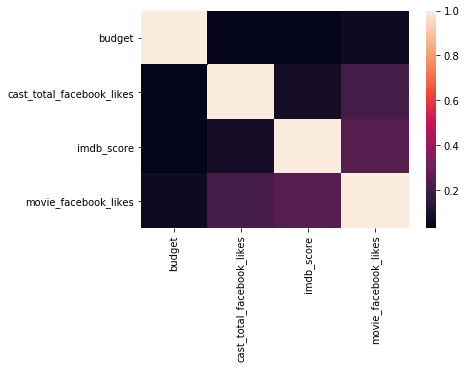

In [7]:
sns.heatmap(df.corr()) # Check Corr() by graph ?? where budegt??
# Corr check!!

In [9]:
# df.loc[df['budget'] == '', 'budget'] = np.nan # Fill missing values as nan
for name in df.columns:
    df.loc[df[name] == '', name] = np.nan

/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


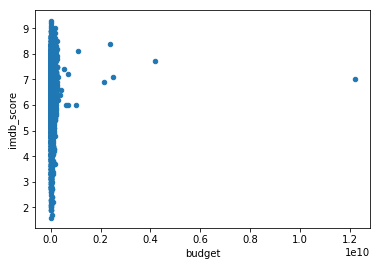

In [10]:
df.plot(kind='scatter', x="budget", y="imdb_score")

In [11]:
df['budget'].quantile(0.75)
IQR = df['budget'].quantile(0.75) - df['budget'].quantile(0.25)


In [12]:
# Eliminate values (75% + 5*IQR )
condition = df['budget'] > (df['budget'].quantile(0.75) + 5*IQR)
type(condition)

pandas.core.series.Series

In [13]:
df[condition].shape

(27, 13)

In [14]:
df[condition].index

Int64Index([   1,    2,    3,    5,    6,    7,    8,    9,   10,   18,   20,
              27, 1016, 1338, 2323, 2334, 2740, 2988, 3005, 3075, 3273, 3311,
            3423, 3461, 3851, 3859, 4542],
           dtype='int64')

In [15]:
# Eliminate outliers 
df.drop(df[condition].index, inplace = True)

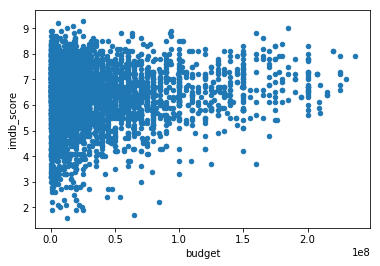

In [16]:
# graph it again
df.plot(kind='scatter', x="budget", y="imdb_score") 

In [17]:
df.corr()

,budget,cast_total_facebook_likes,imdb_score,movie_facebook_likes
budget,1.000000,0.240761,0.041508,0.315596
cast_total_facebook_likes,0.240761,1.000000,0.082898,0.197808
imdb_score,0.041508,0.082898,1.000000,0.246603
movie_facebook_likes,0.315596,0.197808,0.246603,1.000000
